# Machine Learning HW


## (0) Setup

1. Set your working directory.
2. Import cptac, numpy (np), and pandas (pd).
3. Download the Brca dataset
4. Extract the proteomic dataframe from the Brca object.

In [1]:
# set your working director to analysis data
import os
os.chdir('../analysis_data/')

# import cptac, numpy, and pandas
import cptac
import numpy as np
import pandas as pd

# download the Brca dataset
cptac.download(dataset="Brca")
brca = cptac.Brca()

# extract the data
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 
protein_data.columns

Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)

## (1) K-means Clustering of Proteomic Data

1. Install & import sklearn. 
2. Construct elbow plot to determine ideal number of clusters (with appropriate figure caption).
3. Construct k-means plot with color and centroid labels.

In [2]:
!pip install sklearn

In [3]:
import sklearn as sk
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
protein_data = protein_data.dropna(axis=1)

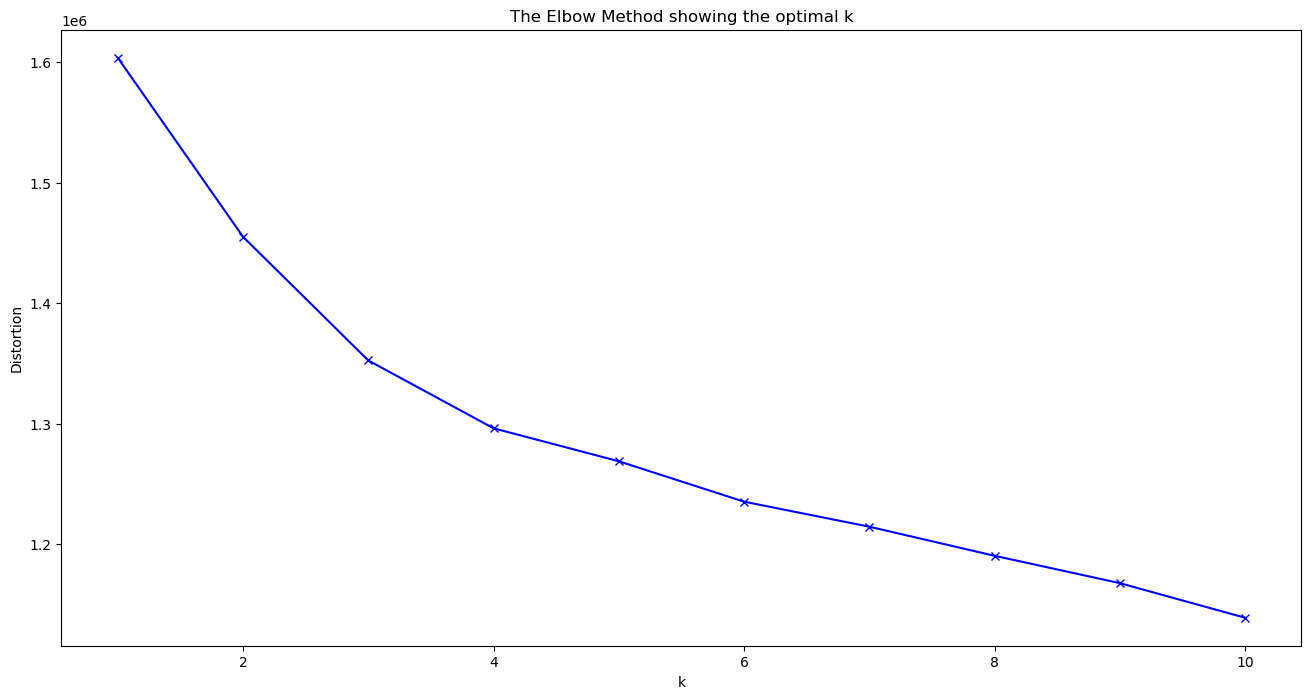

In [5]:
#Tutorial: https://predictivehacks.com/k-means-elbow-method-code-for-python/
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(protein_data)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() 
#Although it is somewhat difficult to ascertain where the "elbow" is, we can estimate that k=4 is where relatively steep
#and different slopes transition into a flat,linear trend of slopes. 

In [6]:
#Training our K-means clustering model with k=4 parameter
kmeanModel = KMeans(n_clusters=4)
labels = kmeanModel.fit_predict(protein_data)
print(labels)

[2 2 2 2 2 1 0 2 2 2 3 3 2 2 0 2 3 0 2 2 2 0 0 0 2 3 3 0 2 0 0 0 0 3 0 2 0
 2 2 1 2 3 3 0 3 3 2 3 0 2 1 0 3 1 1 3 3 0 3 2 1 0 3 1 0 2 2 3 3 3 1 0 0 2
 1 0 1 3 3 0 3 0 0 3 3 0 1 1 1 1 0 3 0 3 2 3 3 0 0 0 3 0 3 3 3 0 1 0 0 1 3
 3 2 2 2 2 1 3 1 0 3 3]


In [7]:
#Getting unique labels
 
u_labels = np.unique(labels)
 
u_labels

array([0, 1, 2, 3], dtype=int32)

In [8]:
protein_data.columns

Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMDC',
       'AAMP', 'AAR2',
       ...
       'ZRSR2', 'ZSCAN18', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZYG11B',
       'ZYX', 'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=7767)

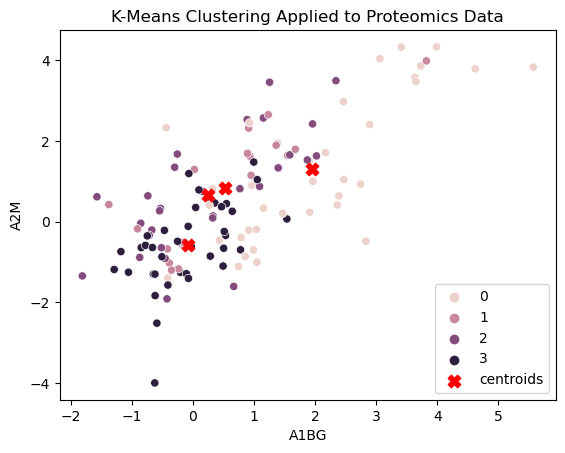

In [9]:
#Tutorial : https://www.reneshbedre.com/blog/kmeans-clustering-python.html
sns.scatterplot(data=protein_data, x=protein_data.iloc[:, 0], y=protein_data.iloc[:, 1], hue=labels)
plt.scatter(kmeanModel.cluster_centers_[:,0], kmeanModel.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.title('K-Means Clustering Applied to Proteomics Data')
plt.legend()
plt.show()

## (2) Perform PCA Analysis
1. Read in RNA and clinical data from CSV generated earlier in the semester.
2. Conduct PCA Analysis using sklearn.
3. Construct 2D PCA plot.

Tutorial : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [10]:
rna_data = pd.read_csv("../../week7_rna/hw7/rna_counts_data.csv", index_col=0)
clinical_data = pd.read_csv("../../week7_rna/hw7/rna_clinical_data.csv", index_col=0)

In [11]:
clinical_data = clinical_data.transpose()

In [12]:
common_cols = list(set(rna_data.columns).intersection(clinical_data.columns))

In [13]:
rna_data = rna_data.loc[:, common_cols]

In [14]:
from sklearn.preprocessing import StandardScaler
rna_data = rna_data.transpose()
features = rna_data.columns
# Separating out the features
x = rna_data.loc[:, features].values

# Standardizing the features
rna_standard = StandardScaler().fit_transform(x)

In [15]:
clinical_data = clinical_data.transpose()
y = clinical_data.loc[:, ["race"]].values

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(rna_standard)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf["race"] = y

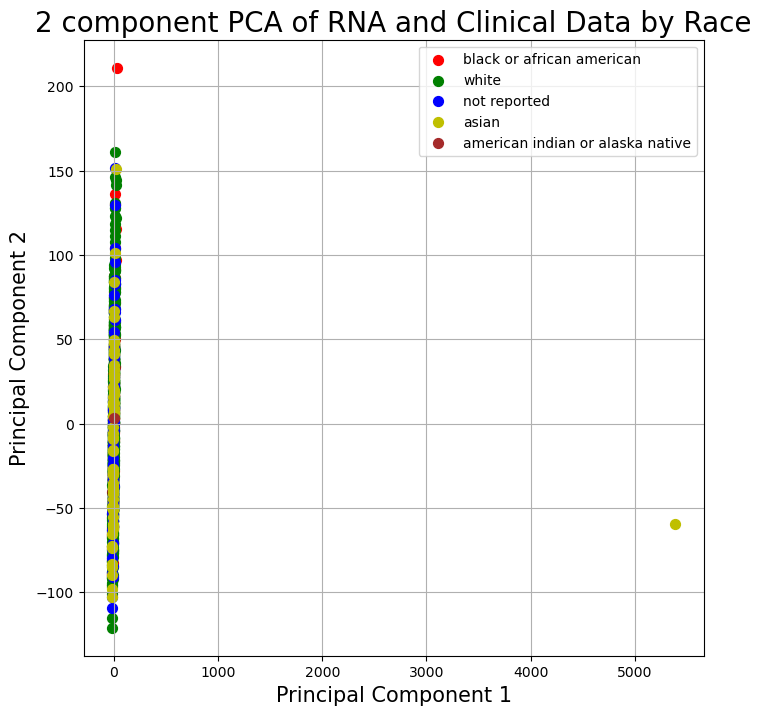

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA of RNA and Clinical Data by Race', fontsize = 20)
targets = ['black or african american', 'white', 'not reported', 'asian', 'american indian or alaska native']
colors = ['r', 'g', 'b', 'y', 'brown']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf["race"] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## (3) UMAP of RNA Data
1. Construct one colored with cluster number from running K-means analysis on RNA data.
2. Construct one colored with a single gene's expression.

Tutorial: https://umap-learn.readthedocs.io/en/latest/clustering.html

In [18]:
!pip install umap-learn

In [19]:
import umap.umap_ as umap

/opt/miniconda3/envs/qbio490_hirad/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0, 0.5, 'UMAP2')

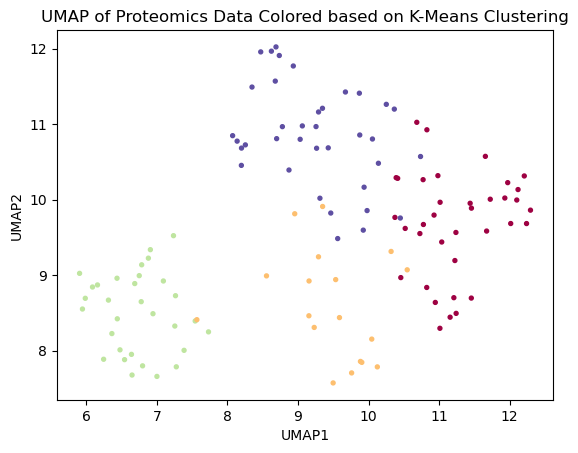

In [20]:
standard_embedding = umap.UMAP().fit_transform(protein_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, s=8, cmap='Spectral')
plt.title('UMAP of Proteomics Data Colored based on K-Means Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
#Can't debug to add legend, for reference: Red = 0, Blue = 1, Orange = 2, Green = 3.

In [21]:
protein_data['AAMP_expr_levels'] = np.where(protein_data.loc[:,'AAMP'] < -1, 0, np.where(protein_data.loc[:,'AAMP'] > 1, 2, 1) )
#Applying a filter by expression levels where Low expression = 0, Moderate = 1, and High = 2.
#We have to apply numerical labels for UMAP to work

In [22]:
expr_labels = protein_data['AAMP_expr_levels']
expr_labels

Patient_ID
CPT000814    1
CPT001846    0
X01BR001     1
X01BR008     1
X01BR009     1
            ..
X21BR001     1
X21BR002     1
X21BR010     1
X22BR005     2
X22BR006     1
Name: AAMP_expr_levels, Length: 122, dtype: int64

Text(0, 0.5, 'UMAP2')

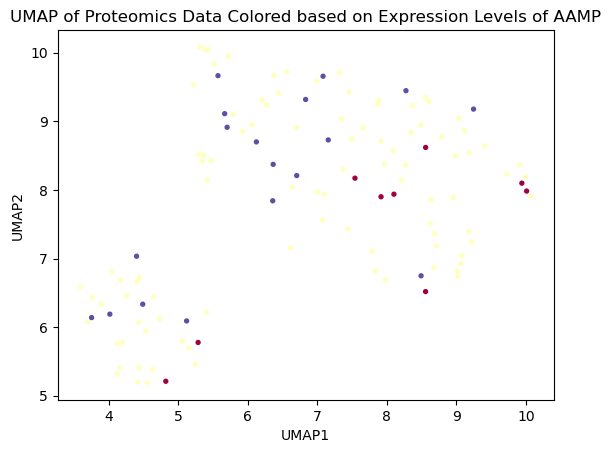

In [23]:
standard_embedding = umap.UMAP().fit_transform(protein_data)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=expr_labels, s=8, cmap='Spectral', )
plt.title('UMAP of Proteomics Data Colored based on Expression Levels of AAMP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
#Can't debug to add legend, for reference: Blue = LOW, Yellow = Moderate, Red = HIGH.

## (EC) Hierarchial Clustering Map of Proteomics Data

Text(0.5, 0.98, 'Hierarchial Cluster Map of Proteomics Data')

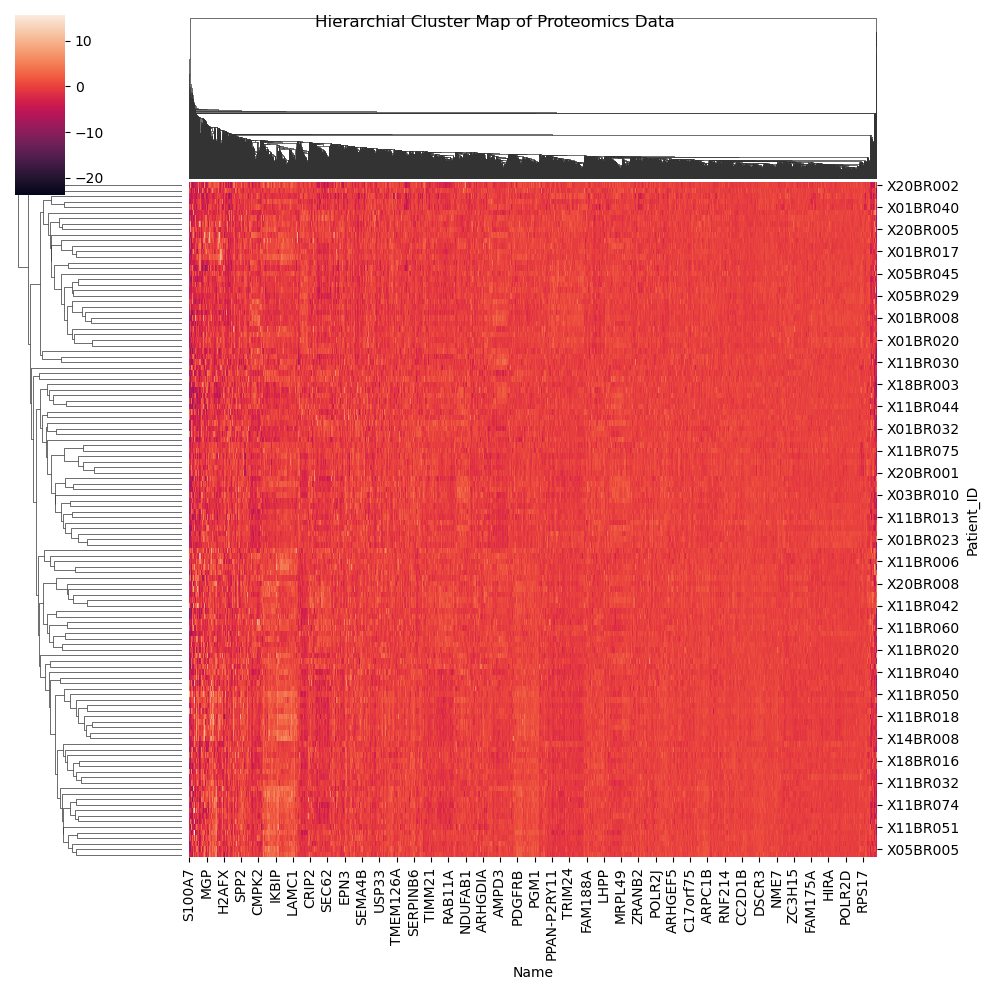

In [27]:
fig = sns.clustermap(protein_data)
fig.fig.suptitle('Hierarchial Cluster Map of Proteomics Data')

## (5) Questions
a. I was surprised to see that my output for UMAP would consistently differ when I would restart the kernel and all cells. This is due to the fact that UMAP is a stochastic/probabilistic algorithm that favors speed of plotting over optimization. I was also surprised to see how my PCA plot didn't offer much separation among race clusters, which shows that race is not significant factor in breast cancer proteomics data. 

b. I would like to see which proteomic features contribute the most to the clustering of the cancer cases. I can check the contribution of each gene by comparing the clusters by the expression of that specific gene to see if there is a statistically significant difference in expression.

c. You could merge the RNA and Protein dataframes via the Numpy intersect function by defining a shared column based on Patient identification. Once we merge the dataframes, we can reconstruct a K-means clustering plot with the merged df and do follow-up UMAP plots. The sketches of the K-means cluster plot and UMAP plot have been included within the Week 11 hw folder. 